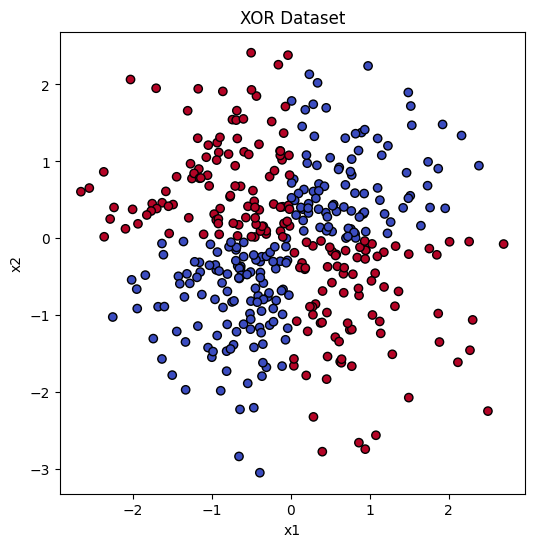

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1, l2

# Step 1: Generate and visualize the XOR dataset
np.random.seed(0)
X = np.random.randn(400, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)

# Plotting the XOR dataset
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k')
plt.title("XOR Dataset")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Plot decision boundary

In [2]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.show()

# Function to train and plot accuracy and loss for each model

In [3]:
def train_and_plot(model, X_train, y_train, X_test, y_test, title):
    history = model.fit(X_train, y_train, epochs=100, verbose=0, validation_data=(X_test, y_test))

    # Plot accuracy and loss over epochs
    epochs = range(1, len(history.history['loss']) + 1)
    plt.figure(figsize=(12, 5))

    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['loss'], label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
    plt.title(f"{title} - Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f"{title} - Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.show()

    return model

# MLP without regularization

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


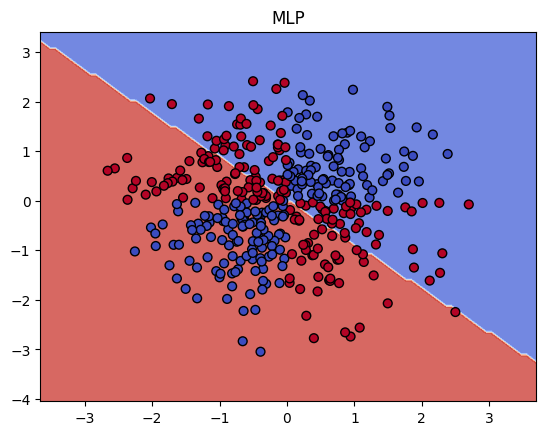

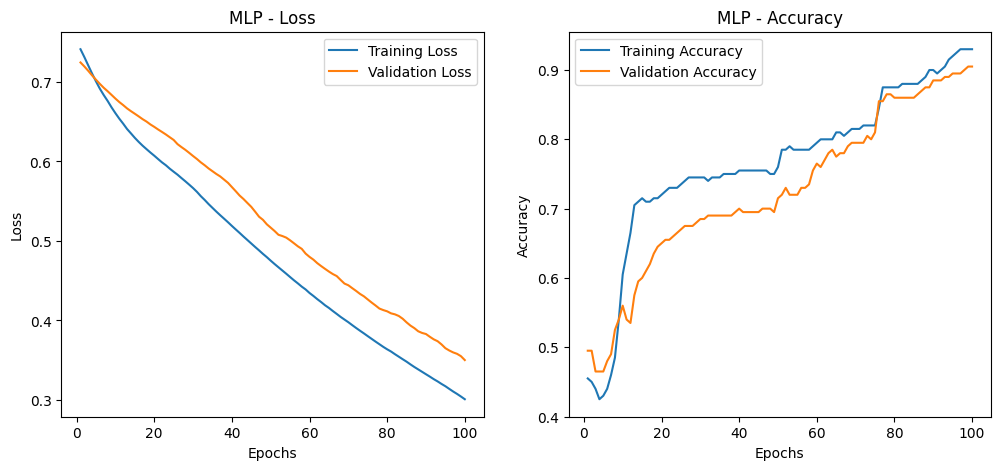

In [5]:
mlp = Sequential([
    Dense(8, input_dim=2, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])
mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
plot_decision_boundary(lambda x: (mlp.predict(x) > 0.5).astype(int), X, y, "MLP")
mlp = train_and_plot(mlp, X_train, y_train, X_test, y_test, "MLP")


# MLP with L1 regularization

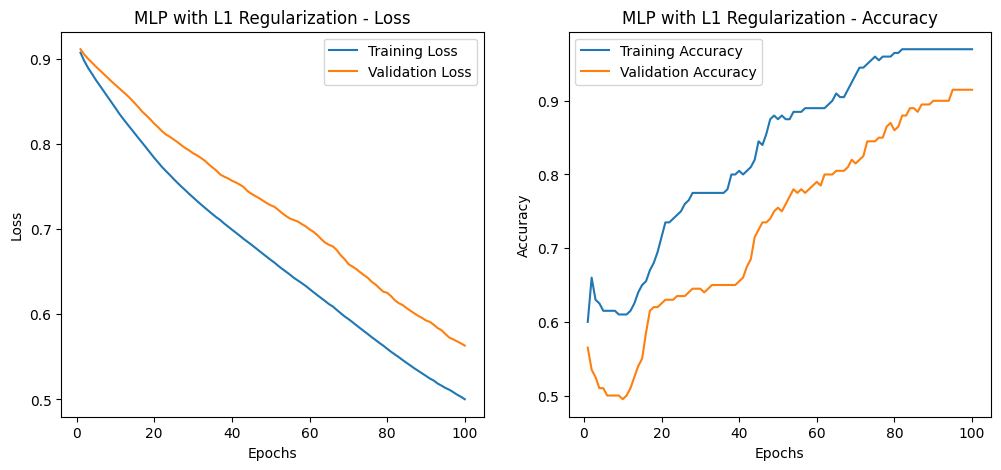

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


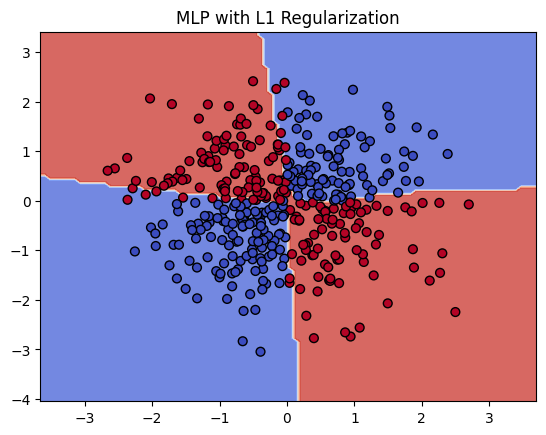

In [6]:
mlp_l1 = Sequential([
    Dense(8, input_dim=2, activation='relu', kernel_regularizer=l1(0.01)),
    Dense(8, activation='relu', kernel_regularizer=l1(0.01)),
    Dense(1, activation='sigmoid')
])
mlp_l1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp_l1 = train_and_plot(mlp_l1, X_train, y_train, X_test, y_test, "MLP with L1 Regularization")
plot_decision_boundary(lambda x: (mlp_l1.predict(x) > 0.5).astype(int), X, y, "MLP with L1 Regularization")

# MLP with L2 regularization

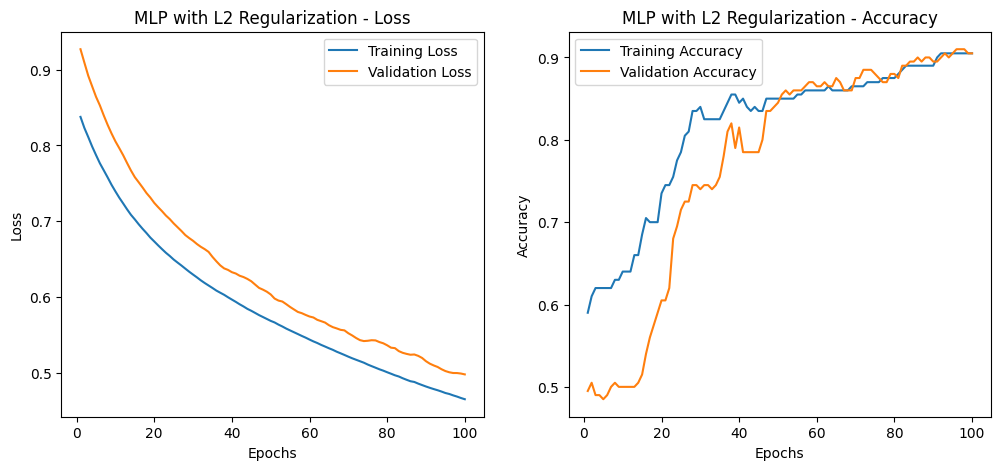

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


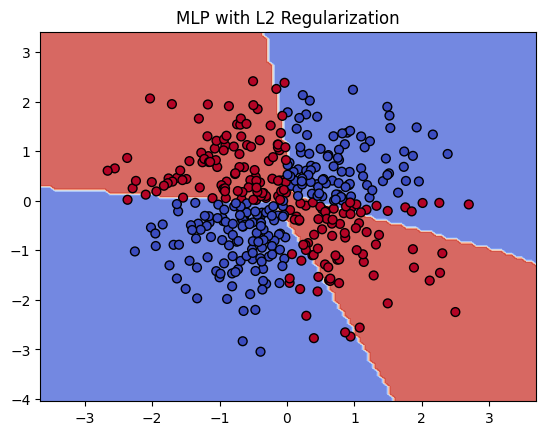

In [7]:
mlp_l2 = Sequential([
    Dense(8, input_dim=2, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(8, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1, activation='sigmoid')
])
mlp_l2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp_l2 = train_and_plot(mlp_l2, X_train, y_train, X_test, y_test, "MLP with L2 Regularization")
plot_decision_boundary(lambda x: (mlp_l2.predict(x) > 0.5).astype(int), X, y, "MLP with L2 Regularization")


# Logistic Regression with Polynomial Features

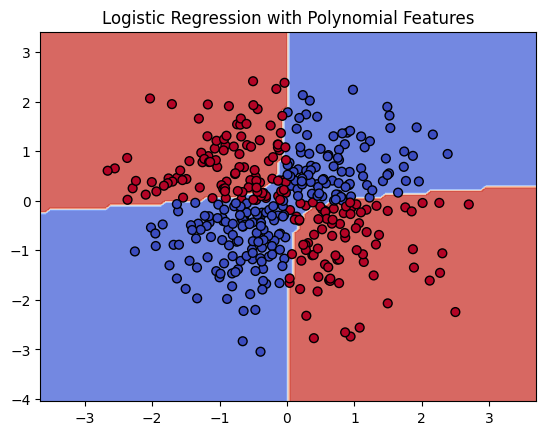

In [8]:
X_poly = np.c_[X, X[:, 0] * X[:, 1], X[:, 0]**2, X[:, 1]**2]
X_train_poly, X_test_poly, _, _ = train_test_split(X_poly, y, test_size=0.5, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train_poly, y_train)
plot_decision_boundary(lambda x: log_reg.predict(np.c_[x, x[:, 0] * x[:, 1], x[:, 0]**2, x[:, 1]**2]), X, y, "Logistic Regression with Polynomial Features")

MLP: A two-layer MLP with ReLU activation learns XOR by capturing the necessary non-linearity.

MLP with L1: L1 regularization sparsifies weights, which could help or hurt depending on regularization strength.

MLP with L2: L2 regularization keeps weights smaller overall, which can provide better generalization.

Logistic Regression with Polynomial Features: Additional polynomial features allow logistic regression to model the XOR shape.